In [1]:
import os, numpy as np
import warnings
from matplotlib import pyplot as plt
from bem.matter import Atom, Lattice, Structure
from bem import xscalc
from bem.matter import loadCif
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
structure_dict = {}
xs_dict = {}
cif_files = ['Zr_293k_hcp.cif', 'Pb_293k_fcc.cif', 'Si_HP.cif', 'C_293k_diamond.cif', 'Si_diamond.cif', 'Ni_293k.cif', 'Al_293k_fcc.cif', 'Al_293k_bcc.cif', 'Be_293k_hcp.cif', 'Ti_295k_hcp.cif', 'SiC_293k.cif', 'C_293k_graphite.cif', 'Zr_293k_bcc.cif']
for any_cif_name in cif_files:
    name = any_cif_name.split('.')[0]
    print('{}, Loaded'.format(name))
    cif_path = './cifs/' + any_cif_name
    structure_dict[name] = loadCif(cif_path)

Zr_293k_hcp, Loaded
Pb_293k_fcc, Loaded
Si_HP, Loaded
C_293k_diamond, Loaded
Si_diamond, Loaded
Ni_293k, Loaded
Al_293k_fcc, Loaded
Al_293k_bcc, Loaded
Be_293k_hcp, Loaded
Ti_295k_hcp, Loaded
SiC_293k, Loaded
C_293k_graphite, Loaded
Zr_293k_bcc, Loaded


In [4]:
wavelengths = np.arange(0.05, 5.5, 0.005)
xs_dict['Wavelength'] = wavelengths
T = 300 # Kelvin

In [5]:
for each in structure_dict.keys():
    print("{}, Done".format(each))
    astruct = structure_dict[each]
    xscalculator = xscalc.XSCalculator(astruct, T, max_diffraction_index=4)
    xs_dict[each] = xscalculator.xs(wavelengths)

Zr_293k_hcp, Done
Pb_293k_fcc, Done
Si_HP, Done
C_293k_diamond, Done
Si_diamond, Done
Ni_293k, Done
Al_293k_fcc, Done
Al_293k_bcc, Done
Be_293k_hcp, Done
Ti_295k_hcp, Done
SiC_293k, Done
C_293k_graphite, Done
Zr_293k_bcc, Done


In [6]:
df = pd.DataFrame.from_dict(xs_dict)
df = df.set_index('Wavelength')
df

,Zr_293k_hcp,Pb_293k_fcc,Si_HP,C_293k_diamond,Si_diamond,Ni_293k,Al_293k_fcc,Al_293k_bcc,Be_293k_hcp,Ti_295k_hcp,SiC_293k,C_293k_graphite,Zr_293k_bcc
Wavelength,,,,,,,,,,,,,
0.050,37.947474,44.013658,32.316995,37.475657,16.162073,72.013134,5.610551,2.806453,37.074349,25.751904,95.902050,37.518435,12.634739
0.055,37.946266,44.012293,32.299924,37.391802,16.154289,72.031545,5.612012,2.807431,37.073000,25.852963,95.769839,37.443563,12.631309
0.060,37.944649,44.010617,32.280502,37.299952,16.145400,72.046954,5.613368,2.808380,37.071511,25.953971,95.624388,37.361552,12.627453
0.065,37.942624,44.008630,32.258730,37.200109,16.135408,72.059361,5.614618,2.809299,37.069882,26.054926,95.465700,37.272404,12.623173
0.070,37.940189,44.006331,32.234608,37.092272,16.124312,72.068765,5.615763,2.810190,37.068112,26.155830,95.293772,37.176117,12.618469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.475,29.098211,41.256629,16.816166,35.640147,19.238216,79.926089,3.638120,1.819060,29.145673,130.210613,72.840869,115.965529,1.763792
5.480,29.147480,41.323077,16.842066,35.716538,19.270956,79.986668,3.642385,1.821192,29.213095,130.316854,72.975506,116.188700,1.765714
5.485,29.196794,41.389598,16.867986,35.793000,19.303724,80.047260,3.646652,1.823326,29.280581,130.423101,73.110265,116.412076,1.767638


<IPython.core.display.Javascript object>


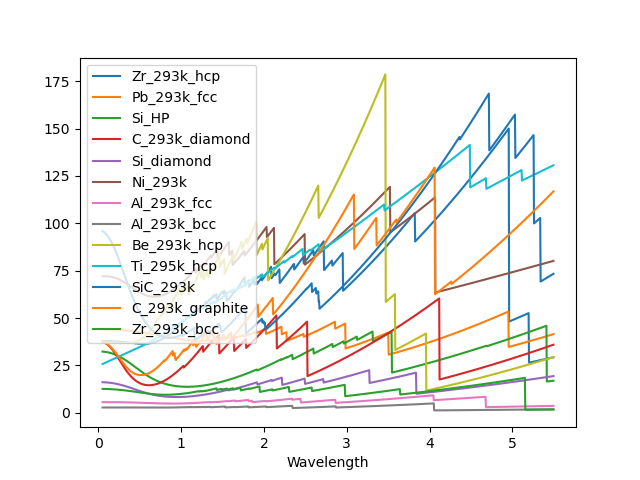

<AxesSubplot:xlabel='Wavelength'>

In [7]:
df.plot()

In [8]:
df.to_clipboard()